In [3]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
%matplotlib inline

# Номер 1 

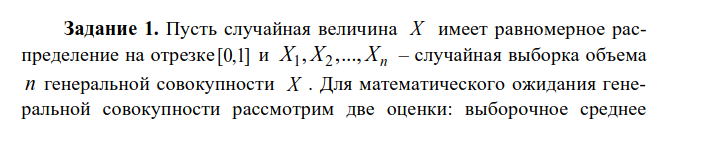

In [1]:
from IPython.display import Image
Image('1.1.png')

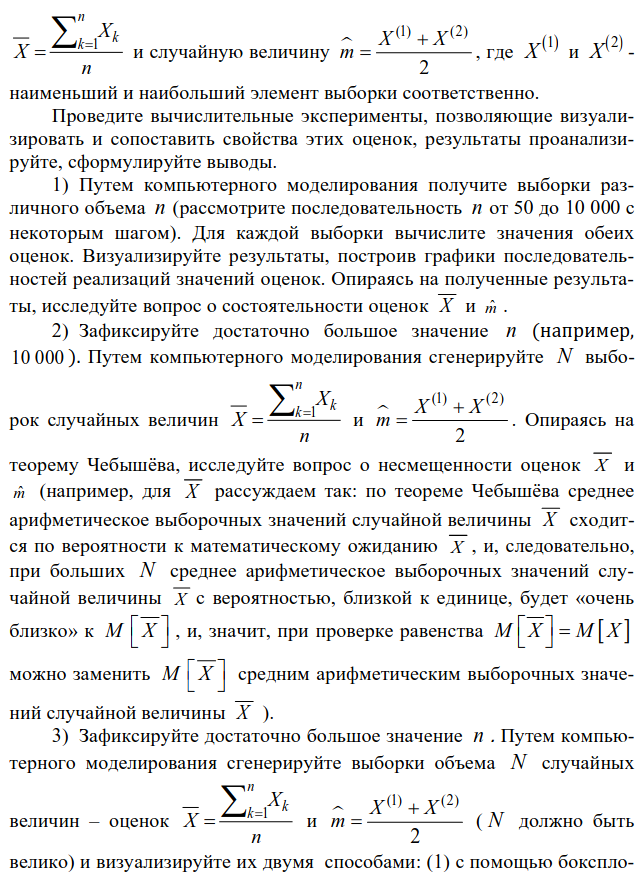

In [7]:
Image('1.2.png')

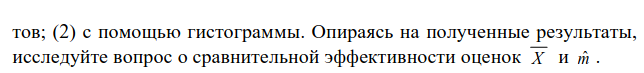

In [8]:
Image('1.3.png')

# Пункт 1 

In [9]:


X = []
M = []

for i in range(100 , 10000 , 100):
    x_general = np.random.uniform(0,1,i)
    X.append(sum(x_general)/len(x_general))
    M.append((max(x_general) + min(x_general)) /2)

print(X)
print(M)



[np.float64(0.4991288864874206), np.float64(0.47675622757443015), np.float64(0.4773219814304273), np.float64(0.47162905234578323), np.float64(0.5149870991207728), np.float64(0.5025934859025442), np.float64(0.505842693441605), np.float64(0.5080442269111852), np.float64(0.5109513764813773), np.float64(0.4968167955017369), np.float64(0.49449636365398086), np.float64(0.49951360547313167), np.float64(0.5025663409851764), np.float64(0.4964604543954528), np.float64(0.4995871102748772), np.float64(0.5108517440151615), np.float64(0.4964195565350169), np.float64(0.495756480613138), np.float64(0.49052283052109075), np.float64(0.5014319642267613), np.float64(0.5108834270872885), np.float64(0.49980502140576244), np.float64(0.5020178436075171), np.float64(0.5066963196851977), np.float64(0.5075933056075019), np.float64(0.4936670979225679), np.float64(0.4985161280408017), np.float64(0.50619103287042), np.float64(0.4959886366679902), np.float64(0.5094279947272105), np.float64(0.50257332268415), np.floa

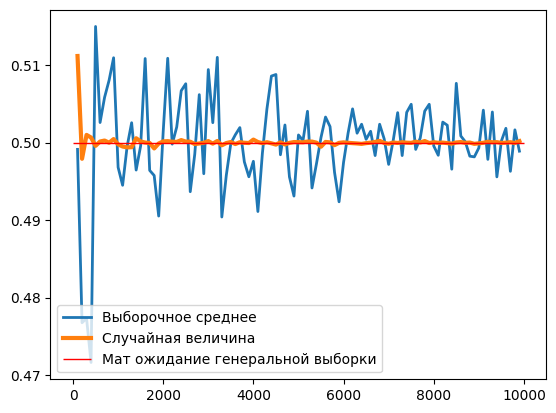

In [10]:
plt.plot(range(100 ,10000 , 100),X  , lw = 2 , label = "Выборочное среднее")
plt.plot(range(100 ,10000 , 100),M , lw = 3 , label = "Случайная величина")
plt.hlines(0.5 ,0, 10000, colors= 'r', label = 'Мат ожидание генеральной выборки' , lw = 1)
plt.legend(loc = 'lower left')
plt.show()



## Обе оценки несмещенные, тк как по вероятности мы сходимся к истинному значению мат ожидания. По графику m с крышечкой сходится по вероятности быстрее .

# Пункт 2

In [11]:

X = []
M = []

n = 10000
N = 1000
for i in range(1, N):
    x_general = np.random.uniform(0,1,n)
    [num, minmax, mean, var, sk, k] = sts.describe(x_general, ddof=0)
    X.append(mean)
    M.append((minmax[0] + minmax[1]) /2)

m = sts.uniform(0 , 1).mean()



print (m)
print (np.mean(X))
print (np.mean(M))







0.5
0.49987890649882694
0.49999997713290645


## И та, и та величина сходится к мат ожиданию.

# Пункт 3

## Боксплот и гистограмма для выборочного среднего;

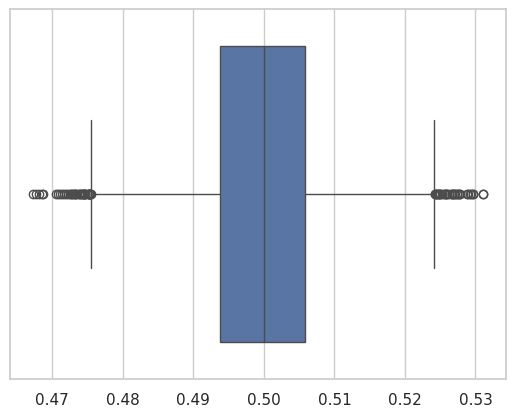

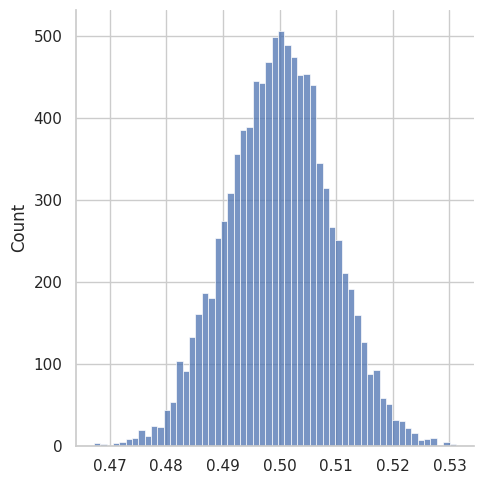

In [28]:
X = []
M = []

n = 10000
N = 1000
for i in range(1, n):
    x_general = np.random.uniform(0,1,N)
    X.append(sum(x_general) / len(x_general))
    M.append((max(x_general) + min(x_general))/2)

seaborn.set(style = 'whitegrid')
f , (ax_box2) = plt.subplots(1 , sharex = True)

seaborn.displot(X)
seaborn.boxplot(X ,ax=ax_box2,orient = 'h' )
plt.show()


## Боксплот и гистограмма для второй оценки;

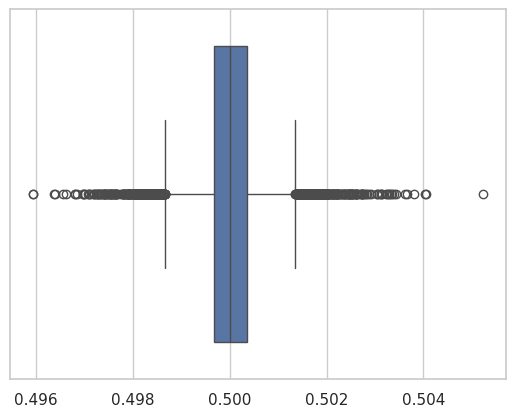

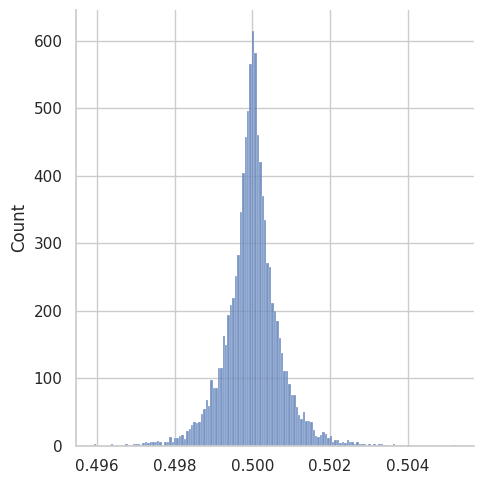

In [29]:

seaborn.set(style = 'whitegrid')
f , (ax_box1) = plt.subplots(1 , sharex = True)
seaborn.displot(M)
seaborn.boxplot(M ,ax=ax_box1,orient = 'h' )
plt.show()

##  В первом боксплоте дисперсия больше(исходя из размера боксплота) а во втором меньше. Следовательно вторая оценка эффективнее чем первая.

# Номер 3

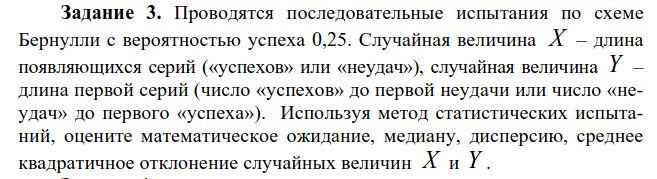

In [33]:
Image("3.png")

In [10]:
a = [0,1]
p = [0.75 , 0.25]
n = 50




Y = []
X =[]

for h in range(50):
    V = np.random.choice(a , n , True , p )
    count = 0
    i = 0
    while(i < n):
        if (V[i] == 1):
            if(count != 0):
                X.append(count)
                count = 0             
            while(i < n and V[i] == 1):
                count += 1
                i += 1
        else:
            if (count != 0):
                X.append(count)
                count = 0
            while(i < n and V[i] == 0):
                count += 1
                i += 1
    i = 0
    count = 0

    while(i < n):
        if (V[i] == 1):
            if(count != 0):
                Y.append(count)
                break
                count = 0             
            while(i < n and V[i] == 1):
                count += 1
                i += 1
        else:
            if (count != 0):
                Y.append(count)
                break
                count = 0
            while(i < n and V[i] == 0):
                count += 1
                i += 1


print("Длина появляющихся серий успехов или неудач", X)
print ("Количество в  первой серии " , Y , "\n\n\n")

M_x = sum(X)/len(X)
D = 0

print("Математическое ожидание X:" , sum(X)/len(X))
print("Медиана X:" , np.median(X))

for i in X:
    D += (i - M_x)**2
D = D / len(X)

print("Дисперсия X:", D)
print("Среднеквадратичное отклонение X:", np.sqrt(D), "\n\n\n")


D = 0
M_y = sum(Y)/len(Y)
print("Математическое ожидание Y:" , sum(Y)/len(Y))
print("Медиана Y:" , np.median(Y))

for i in Y:
    D += (i - M_y)**2
D = D / len(Y)

print("Дисперсия Y:", D)
print("Среднеквадратичное отклонение Y:", np.sqrt(D))


        

    


Длина появляющихся серий успехов или неудач [4, 1, 2, 1, 12, 1, 6, 1, 7, 2, 11, 7, 2, 6, 1, 4, 1, 1, 1, 2, 2, 5, 1, 5, 1, 2, 2, 1, 3, 1, 1, 1, 6, 1, 14, 2, 1, 2, 4, 1, 2, 1, 8, 1, 4, 1, 3, 1, 6, 1, 1, 1, 3, 2, 1, 1, 13, 1, 1, 2, 1, 2, 2, 3, 1, 1, 1, 1, 1, 2, 2, 1, 9, 2, 5, 1, 5, 1, 6, 1, 1, 1, 12, 1, 1, 2, 5, 1, 8, 1, 1, 1, 3, 1, 7, 1, 1, 3, 1, 2, 2, 5, 1, 2, 1, 1, 1, 7, 1, 2, 1, 3, 2, 9, 1, 3, 1, 3, 1, 1, 1, 13, 3, 4, 2, 1, 1, 13, 1, 4, 4, 1, 5, 1, 1, 1, 4, 2, 1, 2, 3, 1, 2, 1, 4, 1, 5, 1, 6, 1, 8, 1, 9, 1, 3, 1, 3, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 4, 1, 1, 1, 3, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 8, 1, 5, 3, 1, 8, 1, 2, 2, 2, 1, 1, 3, 2, 1, 3, 1, 3, 1, 1, 2, 6, 1, 1, 8, 1, 1, 2, 3, 1, 12, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 7, 2, 2, 1, 12, 1, 5, 1, 3, 1, 5, 2, 10, 1, 10, 1, 12, 1, 3, 3, 2, 1, 3, 1, 1, 5, 2, 1, 1, 6, 2, 1, 1, 5, 1, 11, 2, 1, 3, 2, 1, 3, 1, 3, 1, 2, 1, 17, 1, 8, 1, 2, 1, 6, 1, 4, 1, 1, 1, 9, 1, 5, 2, 14, 2, 1, 1, 4, 1, 1, 1, 2, 1, 8, 1, 1, 1, 3, 1

# Номер 4
## Вариант 1

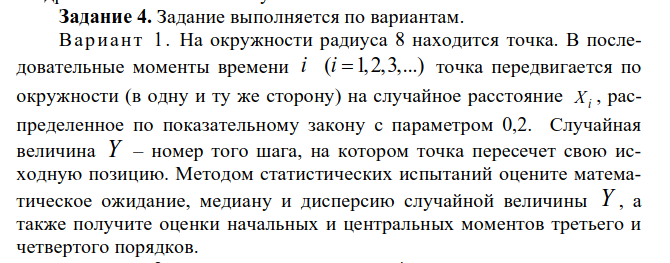

In [32]:
Image("4.png")

Сразу уйдем от окружности к прямой линии; Просто посчитаем количество шагов до достижения L

### параметр равен 1/lambda значит передаем лямбду(мат ожидание, которое равно 5)

In [31]:
R = 8
L = 2*np.pi*R

n = 500
Y = []
for k in range(100):
    X = np.random.exponential(5 , size=n)
    i = 0
    Sum = 0
    while(i < n and Sum < L ):
        Sum += X[i]
        i += 1
    Y.append(i)
print("Номера последнего шага перед перешагиванием:")
print(Y , "\n\n")

print("Мат ожидание Y:" , sum(Y) / len(Y))
print ("Медиана Y:" , np.median(Y))

M = sum(Y) / len(Y)
D = 0

for i in Y:
    D += (i - M)**2

D /=len(Y)

print("Дисперсия Y:" ,D,"\n" )

Sum = 0 
for h in range(len(Y)):
    Sum += Y[h]**3 * 1/len(Y)

print ("Начальный момент 3го порядка:" , Sum)


Sum = 0 
for h in range(len(Y)):
    Sum += Y[h]**4 * 1/len(Y)


print ("Начальный момент 4го порядка:" , Sum ,"\n\n")

Sum = 0 
for h in range(len(Y)):
    Sum += (Y[h] - M)**3 * 1/len(Y)

print ("Центральный момент 3го порядка:" , Sum)

Sum = 0 
for h in range(len(Y)):
    Sum += (Y[h] - M)**4 * 1/len(Y)

print ("Центральный момент 4го порядка:" , Sum)




Номера последнего шага перед перешагиванием:
[16, 10, 16, 15, 11, 8, 8, 19, 6, 13, 11, 10, 14, 13, 15, 10, 9, 14, 11, 18, 20, 9, 7, 13, 3, 13, 9, 9, 13, 11, 13, 10, 14, 15, 5, 15, 11, 9, 7, 12, 6, 15, 12, 11, 15, 10, 10, 13, 8, 13, 10, 4, 21, 14, 4, 13, 7, 17, 13, 6, 10, 14, 14, 10, 8, 10, 10, 10, 14, 9, 8, 5, 13, 7, 7, 13, 11, 11, 8, 17, 6, 9, 7, 10, 8, 10, 6, 15, 8, 11, 11, 20, 10, 6, 9, 9, 10, 4, 12, 17] 


Мат ожидание Y: 10.94
Медиана Y: 10.0
Дисперсия Y: 14.116400000000004 

Начальный момент 3го порядка: 1790.5400000000002
Начальный момент 4го порядка: 25821.479999999996 


Центральный момент 3го порядка: 17.901168000000027
Центральный момент 4го порядка: 576.9513531200001
